In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [4]:
import numpy as np
import csv 

In [5]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
type(x_train)

numpy.ndarray

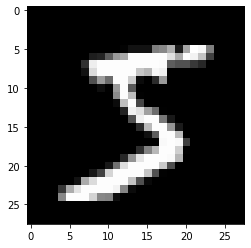

In [8]:
plt.imshow(x_train[0],cmap='gray')

In [9]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape[1:]

TensorShape([32, 32])

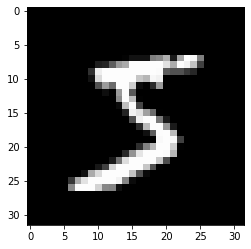

In [10]:
plt.imshow(x_train[0],cmap='gray')

In [11]:
x_train=tf.expand_dims(x_train,axis=3,name=None)
x_test=tf.expand_dims(x_test,axis=3,name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [56]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [12]:
x_val=x_train[-2000:,:,:,:]
y_val=y_train[-2000:]
x_train=x_train[:-2000,:,:,:]
y_train=y_train[:-2000]


In [13]:
x_train.shape[1:]

TensorShape([32, 32, 1])

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_2 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_3 (Activation)   (None, 5, 5, 16)         

In [25]:
model.compile(optimizer='adam',loss=losses.sparse_categorical_crossentropy,metrics=['accuracy'])


In [26]:
history=model.fit(x_train,y_train,batch_size=64,epochs=40,validation_data=(x_val,y_val))


Epoch 1/40
907/907 [==============================] - 14s 15ms/step - loss: 1.5631 - accuracy: 0.4238 - val_loss: 0.3429 - val_accuracy: 0.9010
Epoch 2/40
907/907 [==============================] - 13s 14ms/step - loss: 0.3629 - accuracy: 0.8863 - val_loss: 0.2075 - val_accuracy: 0.9425
Epoch 3/40
907/907 [==============================] - 17s 18ms/step - loss: 0.2719 - accuracy: 0.9144 - val_loss: 0.1456 - val_accuracy: 0.9615
Epoch 4/40
907/907 [==============================] - 13s 15ms/step - loss: 0.2304 - accuracy: 0.9265 - val_loss: 0.1530 - val_accuracy: 0.9565
Epoch 5/40
907/907 [==============================] - 13s 15ms/step - loss: 0.2001 - accuracy: 0.9367 - val_loss: 0.1351 - val_accuracy: 0.9570
Epoch 6/40
907/907 [==============================] - 14s 15ms/step - loss: 0.1793 - accuracy: 0.9434 - val_loss: 0.1153 - val_accuracy: 0.9720
Epoch 7/40
907/907 [==============================] - 15s 16ms/step - loss: 0.1619 - accuracy: 0.9490 - val_loss: 0.1081 - val_accuracy:

In [27]:
history.history

{'loss': [1.5631062984466553,
  0.3628595173358917,
  0.2719396650791168,
  0.23044520616531372,
  0.20008793473243713,
  0.17931053042411804,
  0.16189272701740265,
  0.14569173753261566,
  0.1387515366077423,
  0.1236322820186615,
  0.11856351792812347,
  0.11194215714931488,
  0.10772982984781265,
  0.09985656291246414,
  0.09564525634050369,
  0.08996038883924484,
  0.08845983445644379,
  0.08200416713953018,
  0.07883331179618835,
  0.07832814007997513,
  0.07529140263795853,
  0.06998762488365173,
  0.06900744140148163,
  0.06859195977449417,
  0.06641115248203278,
  0.06428318470716476,
  0.062316183000802994,
  0.05934767797589302,
  0.057699646800756454,
  0.059063706547021866,
  0.057946208864450455,
  0.055599767714738846,
  0.050535961985588074,
  0.05171491205692291,
  0.05151703953742981,
  0.04851241037249565,
  0.04646490141749382,
  0.04775933176279068,
  0.045313429087400436,
  0.04648754373192787],
 'accuracy': [0.423827588558197,
  0.886344850063324,
  0.91437929868

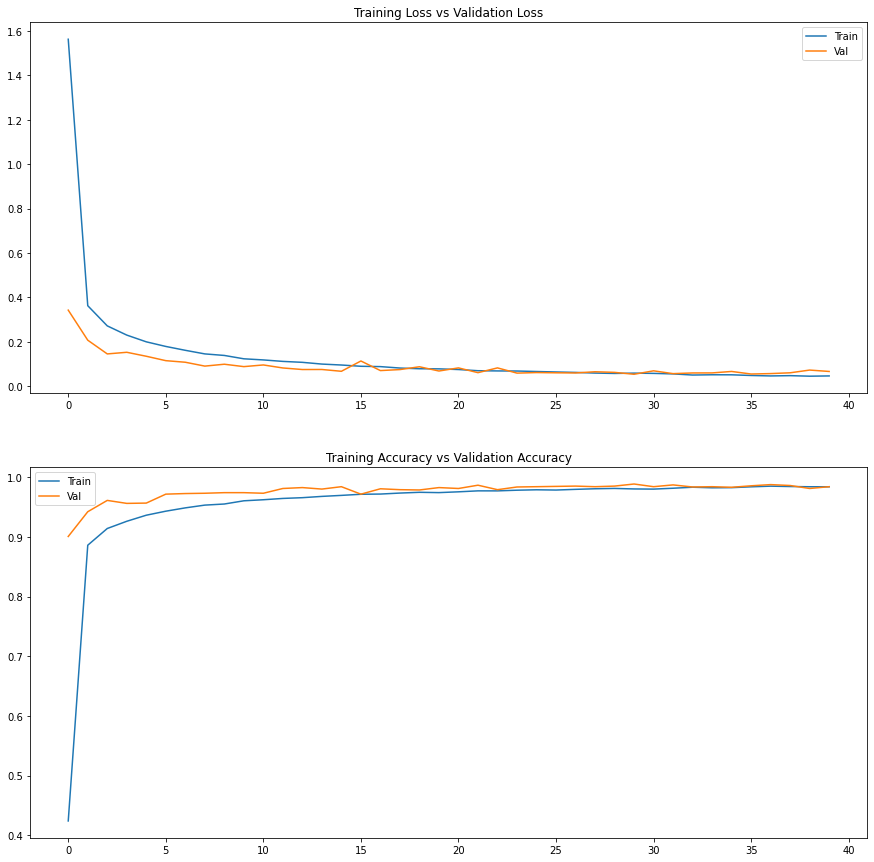

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])


In [29]:
model.evaluate(x_test,y_test)

313/313 [==============================] - ETA: 0s - loss: 0.0729 - accuracy: 0.97 - 1s 4ms/step - loss: 0.0733 - accuracy: 0.9775


[0.07326621562242508, 0.9775000214576721]

In [35]:
from tensorflow.keras.models import Sequential, save_model, load_model


In [36]:
# Save the model
save_model(model, './')

INFO:tensorflow:Assets written to: ./assets


In [46]:
from PIL import Image
image=Image.open("4.jpg").convert('L')
image.save('4_grayscaled.jpg')
image.show()

In [47]:
imdata=np.asarray(image)
imdata.shape

(32, 32)

In [48]:
imdata

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 253, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [57]:
print(imdata[...,np.newaxis].shape)

(32, 32, 1)


In [68]:
ml=[]

In [72]:
ml.append(imdata)
sample=np.array(ml)
sample.shape

(4, 32, 32)

In [73]:
sample

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 253, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 253, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 253, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 253, ..., 255, 255, 255],
        ..

In [82]:
prediction = model.predict(sample)

In [83]:
classes = np.argmax(prediction, axis = 1)
print(classes)

[5 5 5 5]
